# Задача №2

## Задача Римана о распаде разрыва

Рассматривается одномерная область $ x \in [-L, L] $, $L = 10$ м, заполненная идеальным газом (показатель адиабаты равен $\frac{5}{3}$). По середине области (при $x = 0$) располагается тонкая перегородка, по обе стороны от которой газ имеет различные термодинамические параметры. В частности, параметры газа слева от перегородки $𝑣_𝐿 = 0, 𝜌_𝐿 = 13\frac{кг}{м^3}, 𝑃_𝐿 = 10$ атм, параметры газа справа от перегородки $𝑣_𝑅 = 0, 𝜌_𝑅 = 1.3\frac{кг}{м^3}, 𝑃_𝑅 = 1$ атм. В момент времени $t = 0$ перегородку убирают. С помощью схемы Куранта-Изаксона-Риса (КИР) получить численное решение задачи о распаде разрыва до момента времени $0.02$ с.

### Статья на Wikipedia - https://ru.wikipedia.org/wiki/Задача_Римана_о_распаде_произвольного_разрыва

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Задание начальных данных

In [2]:
# Показатель адиабаты
gamma = 5 / 3

# Плотность газа слева и справа
ro_l = 13
ro_r = 1.3

# Давление слева и справа
p_l = 10e5
p_r = 1e5

# Скорости
u_l = 0
u_r = 0

In [3]:
# Ограничения
L = 10
T = .02

### 2. Генерация сетки

In [4]:
c = np.sqrt(gamma * p_l / ro_r)
h = 0.01
tau = h / c
print(tau)

h_dim = int(2 * L / h + 1)
t_dim = int(T / tau + 1)
w = np.zeros((h_dim, t_dim, 3))
x = np.linspace(-L, L, h_dim)

8.831760866327847e-06


In [5]:
# Начальные условия
w[:int(h_dim / 2) + 1, 0] = [ro_l, 0, p_l / (gamma - 1)]
w[-int(h_dim / 2):, 0] = [ro_r, 0, p_r / (gamma - 1)]

In [6]:
# Матрица (ro, u, P)
ans = np.zeros((h_dim, t_dim, 3))
ans[:int(h_dim / 2) + 1, 0] = [ro_l, 0, p_l]
ans[-int(h_dim / 2):, 0] = [ro_r, 0, p_r]

### 3. Цикл с расчётами

In [7]:
for i_t in range(0, t_dim - 1):
    for i_h in range(1, h_dim - 1):

        ro = w[i_h, i_t, 0]
        u = w[i_h, i_t, 1] / ro
        epsilon = w[i_h, i_t, 2] / ro
        p = (gamma - 1) * ro * epsilon
        c = np.sqrt(gamma * p / ro)
        a = np.array([[0, 1, 0],
                      [-u ** 2, 2 * u, gamma - 1],
                      [-gamma * u * epsilon, gamma * epsilon, u]])
        omega_t = np.array([[-u * c, c, gamma - 1],
                            [-c ** 2, 0, gamma - 1],
                            [u * c, -c, gamma - 1]])
        abs_lambda = np.abs(np.array([[u + c, 0, 0],
                                      [0, u, 0],
                                      [0, 0, u - c]]))
        temp = 1 / 2 / c**2
        omega_t_inv = np.array([[temp, -2 * temp, temp],
                                [(u + c) * temp, - 2 * u * temp, (u - c) * temp],
                                [1 / 2 / (gamma - 1), 0, 1 / 2 / (gamma - 1)]])
        
        lambda_dash = omega_t_inv @ abs_lambda @ omega_t

        # Считаем w на следующем слое
        w[i_h, i_t + 1] = w[i_h, i_t] - \
            a @ (w[i_h + 1, i_t] - w[i_h - 1, i_t]) * tau / 2 / h + \
            lambda_dash @ (w[i_h + 1, i_t] - 2 * w[i_h, i_t] + w[i_h - 1, i_t]) * tau / 2 / h

        # Сохраняем значенния ro, u, p
        ro_next = w[i_h, i_t + 1, 0]
        u_next = w[i_h, i_t + 1, 1] / ro_next
        p_next = (gamma - 1) * w[i_h, i_t + 1, 2]
        ans[i_h, i_t + 1] = [ro_next, u_next, p_next]
        
    # Граничные условия
    w[0, i_t + 1] = w[1, i_t + 1]
    w[h_dim - 1, i_t + 1] = w[h_dim - 2, i_t + 1]
    ans[0, i_t + 1] = ans[1, i_t + 1]
    ans[h_dim - 1, i_t + 1] = ans[h_dim - 2, i_t + 1] 

### 4. Построение графиков 

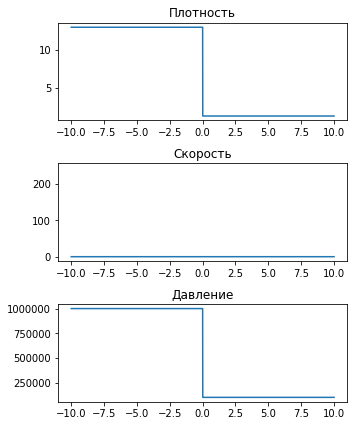

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(5, 6))
f_1 = axs[0].plot(x, ans[:, 0, 0])
f_2 = axs[1].plot(x, ans[:, -1, 1])
f_3 = axs[2].plot(x, ans[:, 0, 2])
axs[0].set_title('Плотность')
axs[1].set_title('Скорость')
axs[2].set_title('Давление')
fig.tight_layout(pad=1.0)


for i in range(t_dim):
    f_1[0].set_ydata(ans[:, i, 0])
    f_2[0].set_ydata(ans[:, i, 1])
    f_3[0].set_ydata(ans[:, i, 2])
    plt.pause(0.02)

plt.show()